In [500]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Tahapan yang bakal kita lakukan 
1. Prepare Dataset
2. Clearing Data
3. Feature Engginering
4. Modeling
5. Evaluasi model

#### Tentang dataset
1. InvoiceNo = Invoice Number
2. StockCode = Unique Code for each transaction
3. Description = Description of individual item
4. Quantity = Number of Items brought
5. InvoiceDate = Date of purchase
6. UnitPrice = Price of individual unit
7. CustomerID = Unique ID for each customer
8. Country = Country of Rence

 


## 1. Prepare Dataset

kita pake `Online-retail.csv` sebagai data yang ingin kita clustering

In [504]:
data = pd.read_csv('Online-retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Clearing Data

In [506]:
# membuat salinan unutuk menjaga keaslian data awal
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [507]:
len(df)

541909

In [508]:
# cek apakah ada nilai yang hilang
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### hapus data menggunakan `.dropna()` 
`.dropna()` berfungsi untuk menghapus baris yang memiliki data yang hilang

In [510]:
df.dropna(inplace=True)

In [511]:
# cek kondisi data sekarang
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [512]:
len(df)

406829

setelah mengatasi data yang hilang kita cek apakah ada duplikasi pada data menggunakan `.duplicated()` dan `.sum()`

In [514]:
df.duplicated().sum()

5225

hapus duplicated data menggunakan 

In [516]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [517]:
len(df)

401604

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


cek apakah ada kolom yang bernilai negative

In [520]:
df_inv = df[df['Quantity']<=0]
df_inv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [521]:
df_inv = df[df['UnitPrice']<=0]
df_inv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


dataset kita berkaitan dengan harga dan jumlah barang, olehkarena itu kita akan mengambil nilai positif dan membuang nilai negatif

In [523]:
df_clean = df[df['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice']>0]

## Feature Engginering

menambahkan kolom kolom pendukung pada dataset

In [526]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [527]:
df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [528]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [529]:
df_amount = df_clean.groupby('CustomerID')['Amount'].sum().reset_index()
df_amount.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [530]:
df_frequency = df_clean.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [531]:
df_frequency.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [532]:
df_frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [533]:
total_quantity = df_clean.groupby('CustomerID')['Quantity'].sum().reset_index(name='TotalQuantity')
total_quantity.head()

,CustomerID,TotalQuantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [534]:
df_gabung = pd.concat([df_amount, df_frequency['Frequency'], total_quantity['TotalQuantity']], axis=1)
df_gabung.head()

,CustomerID,Amount,Frequency,TotalQuantity
0,12346.0,77183.60,1,74215
1,12347.0,4310.00,182,2458
2,12348.0,1797.24,31,2341
3,12349.0,1757.55,73,631
4,12350.0,334.40,17,197


#### Cek apakah ada outlier pada data

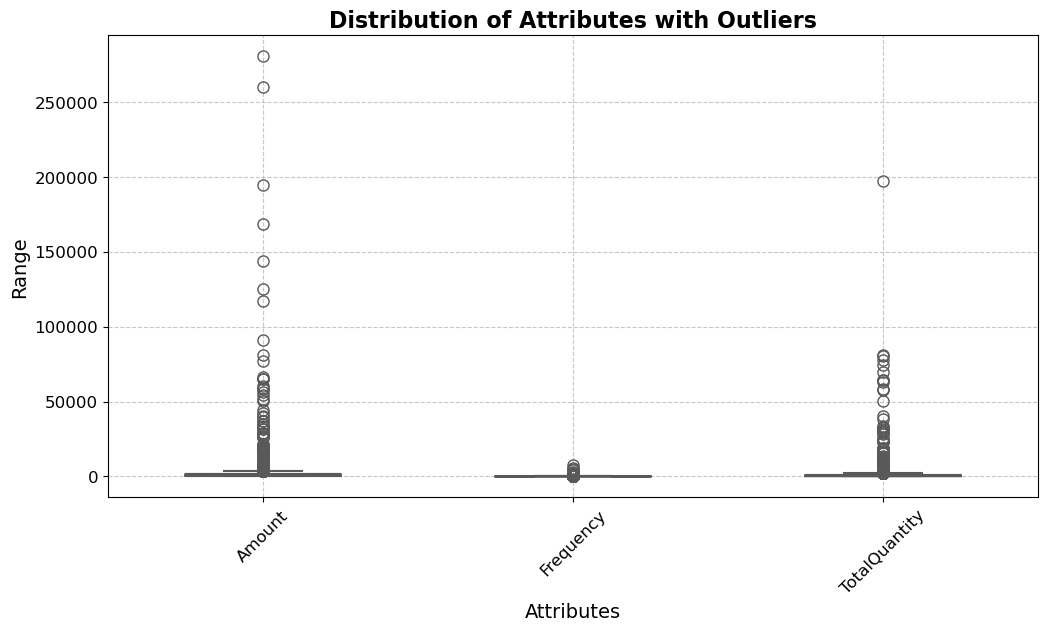

In [536]:
# DataFrame dengan data yang sudah di-melt
data = df_gabung[attributes]
data_melted = pd.melt(data, var_name='Attributes', value_name='Range')

# Buat boxplot dengan penyesuaian visual
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attributes', y='Range', data=data_melted, 
            hue='Attributes',  # Menambahkan hue untuk menyesuaikan palette
            palette='Set2',    # Menggunakan palet warna
            width=0.5,         # Menyesuaikan lebar boxplot
            fliersize=8,       # Ukuran titik outlier
            linewidth=1.5,     # Ketebalan garis boxplot
            notch=True,        # Menambahkan notch pada boxplot
            legend=False)      # Tidak menampilkan legenda

# Kustomisasi plot
plt.title("Distribution of Attributes with Outliers", fontsize=16, fontweight='bold')
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Range", fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotasi dan ukuran font sumbu X
plt.yticks(fontsize=12)               # Ukuran font sumbu Y

# Menampilkan plot
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid dengan garis putus-putus
plt.show()

In [537]:
# Removing (statistical) outliers for Amount
Q1 = df_gabung.Amount.quantile(0.05)
Q3 = df_gabung.Amount.quantile(0.95)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.Amount >= Q1 - 1.5*IQR) & (df_gabung.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = df_gabung.TotalQuantity.quantile(0.05)
Q3 = df_gabung.TotalQuantity.quantile(0.95)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.TotalQuantity >= Q1 - 1.5*IQR) & (df_gabung.TotalQuantity <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = df_gabung.Frequency.quantile(0.05)
Q3 = df_gabung.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.Frequency >= Q1 - 1.5*IQR) & (df_gabung.Frequency <= Q3 + 1.5*IQR)]

## Melakukan Scaling dataset
Berikut poin-poin kegunaan scaling data untuk clustering:

1. **Menghindari Bias dalam Pengukuran Jarak:** Mencegah fitur dengan skala besar mendominasi pengukuran jarak.
2. **Meningkatkan Kualitas Clustering:** Memastikan semua fitur berkontribusi secara proporsional dalam pembentukan cluster.
3. **Mempercepat Konvergensi:** Membantu algoritma seperti K-Means mencapai konvergensi lebih cepat.
4. **Menghindari Penemuan Cluster yang Salah:** Mencegah pembentukan cluster yang tidak akurat atau kurang bermakna akibat perbedaan skala antar fitur.

In [539]:
df_gabung.columns

Index(['CustomerID', 'Amount', 'Frequency', 'TotalQuantity'], dtype='object')

In [540]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = df_gabung[['Amount', 'Frequency', 'TotalQuantity']]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

scaled_data

array([[ 1.74479695,  1.11631095,  1.70372374],
       [ 0.29435306, -0.45821795,  1.58706732],
       [ 0.27144275, -0.02026952, -0.11791116],
       ...,
       [-0.69641839, -0.7084742 , -0.69321676],
       [-0.64029419, -0.65633749, -0.64436065],
       [ 0.31746541, -0.05155155,  0.83428443]])

In [541]:
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = ['Amount', 'Frequency', 'TotalQuantity']
df_scaled.head()

,Amount,Frequency,TotalQuantity
0,1.744797,1.116311,1.703724
1,0.294353,-0.458218,1.587067
2,0.271443,-0.020270,-0.117911
3,-0.550044,-0.604201,-0.550637
4,0.703495,0.104859,-0.212632


In [542]:
df_scaled.describe()

,Amount,Frequency,TotalQuantity
count,4.241000e+03,4.241000e+03,4.241000e+03
mean,-6.701653e-18,7.623130e-17,-2.680661e-17
std,1.000118e+00,1.000118e+00,1.000118e+00
min,-7.409056e-01,-7.710383e-01,-7.460611e-01
25%,-5.686021e-01,-6.042008e-01,-5.915163e-01
50%,-3.692783e-01,-3.747992e-01,-3.831300e-01
75%,1.500221e-01,1.987047e-01,1.652549e-01
max,7.358366e+00,6.517675e+00,6.578367e+00


## Modelling

In [602]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled[['Amount', 'TotalQuantity']], df_scaled[['Frequency']], test_size=0.2, random_state=42)

#### Membuat model

In [605]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

kmeans.fit_transform(X_train)

array([[0.11763713, 5.21898853, 1.74590559],
       [0.21440737, 5.46046889, 1.98406974],
       [0.32190615, 5.5675175 , 2.09148011],
       ...,
       [0.14953326, 5.35611607, 1.88096218],
       [0.37342469, 5.61902912, 2.14265639],
       [0.37707469, 5.62384008, 2.14758317]])

<Axes: xlabel='Amount', ylabel='TotalQuantity'>

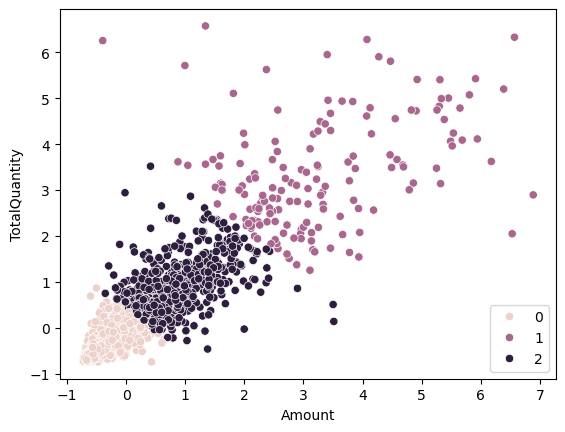

In [607]:
sns.scatterplot(data = X_train, x = 'Amount', y = 'TotalQuantity', hue = kmeans.labels_)

## Evaluasi Model
Menggunakan `silhouette_score` dari Sklearn untuk menilai kualitas Clustering

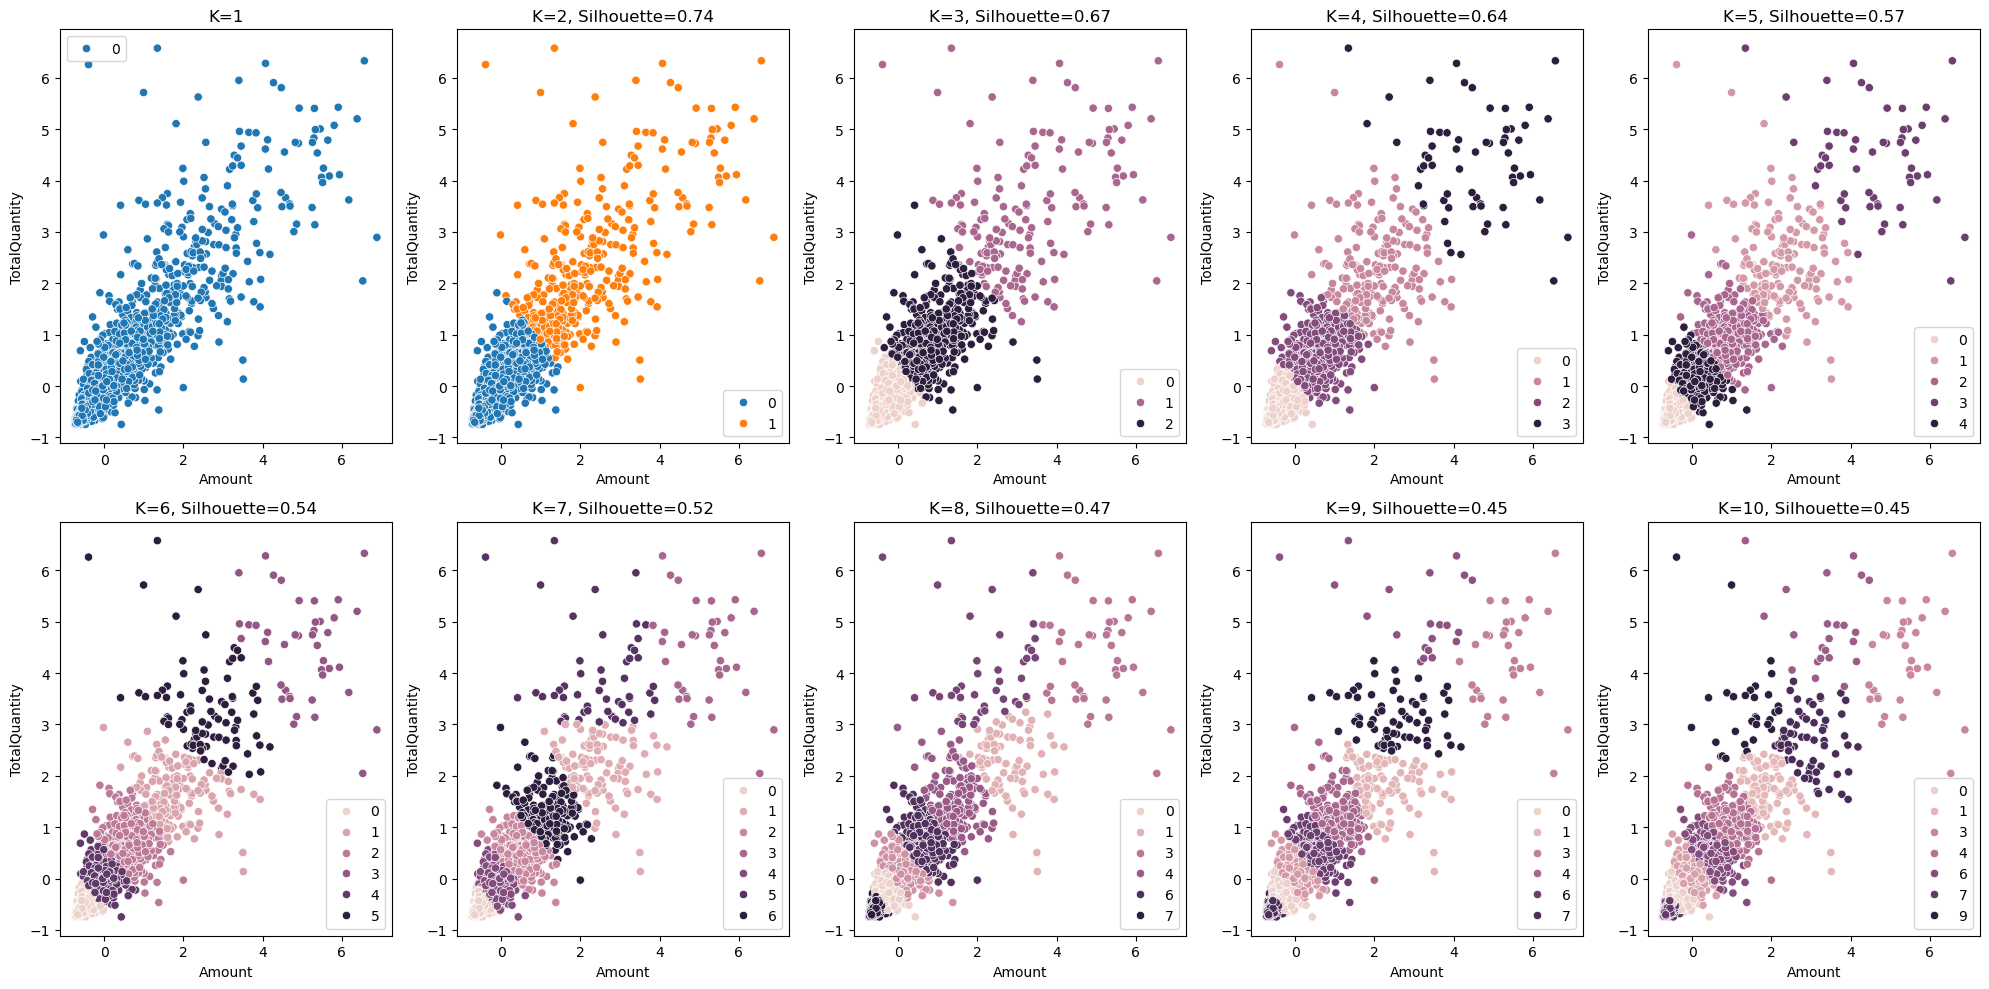

In [610]:
from sklearn.metrics import silhouette_score

# Asumsikan X_train adalah DataFrame yang sudah disiapkan
K = range(1, 11)
fits = []
scores = []

for k in K:
    # Train the model for current value of k on training data
    model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    
    # Append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    if k > 1:  # silhouette_score tidak dapat dihitung untuk k=1df_scaled
        score = silhouette_score(X_train, model.labels_, metric='euclidean')
        scores.append(score)
    else:
        scores.append(float('nan'))  # Mengisi NaN untuk k=1

# Membuat plot dengan subplot
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 baris, 5 kolom
axes = axes.flatten()

for i, k in enumerate(K):
    ax = axes[i]
    
    sns.scatterplot(
        data=X_train, 
        x='Amount', y='TotalQuantity', 
        hue=fits[i].labels_,  
        ax=ax, 
        legend=True
    )
    ax.set_title(f'K={k}, Silhouette={scores[i]:.2f}' if k > 1 else f'K={k}')
    ax.set_xlabel('Amount')
    ax.set_ylabel('TotalQuantity')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

<Axes: >

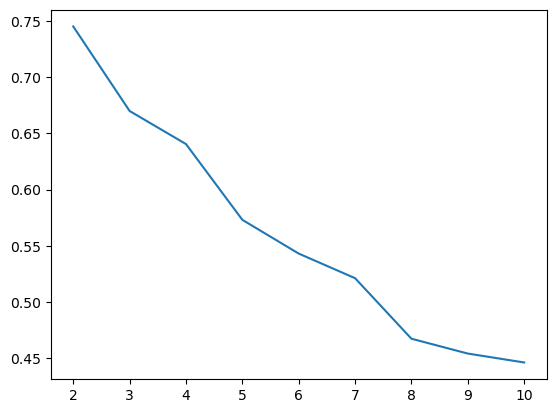

In [611]:
sns.lineplot(x = K, y = scores)

#### Best score yang kita dapatkan 

In [613]:
# Mengambil nilai terbesar, mengabaikan NaN
max_value = max(filter(lambda x: not pd.isna(x), scores))

# Cetak nilai terbesar dalam persentase dengan dua angka di belakang koma
print(f"Nilai terbesar adalah: {max_value * 100:.2f}%")

Nilai terbesar adalah: 74.49%
